# Preprocessing

All datasets were merged to one single dataframe with only those participants that attended all parts as rows. In the columns you have the questions for all parts.

In [61]:
import pandas as pd


In [62]:
survey1_1 = pd.read_csv('part1/survey_1_full.csv', sep=';')
survey1_2 = pd.read_csv('part1/survey_2_full.csv', sep=';')
survey2 = pd.read_csv('part2/results-survey757215.csv')
survey3 = pd.read_csv('part3/results-survey289434.csv')
mail_token = pd.read_csv('part3/tokens_289434.csv')

In [63]:
#drop if completed is N
mail_token = mail_token[mail_token['completed'] != 'N']
#drop all columns except token and email
mail_token = mail_token[['token', 'email']]
mail_token.shape

(35, 2)

In [64]:
mail_token

,token,email
0,wavd33hflun7qC1,martin.wild.1997@gmail.com
1,FX9etYE6Jk8FclU,robert.weber@80s80s.de
2,6uK9uF09xVMAU0W,tillmann.schwoerer@fh-kiel.de
3,V0JupQcvAP5BRuF,fabiangeiger87@web.de
4,cmaxM9RuorwIZr4,friderikeschmidt2002@gmail.com
5,3hzvSiKrFeDvR7w,d.joseph.weihrauch@gmail.com
6,y3hNgW6fOiZSmfD,kathypat7@gmail.com
7,aEPiPKzzaPOOH4H,jane.kelting@googlemail.com
8,YTmYpmRaKIywPzK,Baibaiaymane@gmail.com
9,J4ArG6zBHzaZmAG,sven_krueger@hotmail.com


In [65]:
columnnames = ["id", "date_send", "last_page", "language", "random_value", "gender", "birthdate", "country_youth", "how_often_80s", "used_recommender", "openess1", "openess2", "openess3", "text", "q1_lyrics", "q1_sound", "q1_general", "q2_lyrics", "q2_sound", "q2_general", "q3_lyrics", "q3_sound", "q3_general", "q4_lyrics", "q4_sound", "q4_general", "q5_lyrics", "q5_sound", "q5_general", "q6_lyrics", "q6_sound", "q6_general", "q7_lyrics", "q7_sound", "q7_general", "q8_lyrics", "q8_sound", "q8_general", "q9_lyrics", "q9_sound", "q9_general", "q10_lyrics", "q10_sound", "q10_general", "q11_lyrics", "q11_sound", "q11_general", "q12_lyrics", "q12_sound", "q12_general", "q13_lyrics", "q13_sound", "q13_general", "q14_lyrics", "q14_sound", "q14_general", "q15_lyrics", "q15_sound", "q15_general", "q16_lyrics", "q16_sound", "q16_general", "q17_lyrics", "q17_sound", "q17_general", "q18_lyrics", "q18_sound", "q18_general", "q19_lyrics", "q19_sound", "q19_general", "q20_lyrics", "q20_sound", "q20_general", "comments", "email", "time_total", "time_demografic", "time_base_question", "time_recommender", "time_end", "speeding", "pattern"]
survey1_1.columns = columnnames

In [66]:
drop_col = ["id", "date_send", "last_page", "random_value", "text"]
survey1_1.drop(drop_col, axis=1, inplace=True)
for i in range(1, 21):
    survey1_1.drop(f'q{i}_lyrics', axis=1, inplace=True)
    survey1_1.drop(f'q{i}_sound', axis=1, inplace=True)


In [67]:
columnnames2 = columnnames.copy()
#delete everything that has lyrics or sound in it
for i in range(1,21):
    columnnames2.remove('q'+str(i)+'_lyrics')
    columnnames2.remove('q'+str(i)+'_sound')

survey1_2.columns = columnnames2

In [68]:
survey1_2.drop(drop_col, axis=1, inplace=True)

In [69]:
survey1 = pd.concat([survey1_1, survey1_2], axis=0, ignore_index=True)
survey1.shape

(76, 38)

In [70]:
survey1.dropna(subset=['email'], inplace=True)
survey1.shape

(74, 38)

In [71]:
mail_token['email'] = mail_token['email'].str.lower()
survey1['email'] = survey1['email'].str.lower()

In [72]:
df = pd.merge(survey1, mail_token, on='email', how='outer')
df

,language,gender,birthdate,country_youth,how_often_80s,used_recommender,openess1,openess2,openess3,q1_general,...,comments,email,time_total,time_demografic,time_base_question,time_recommender,time_end,speeding,pattern,token
0,de-easy,männlich,10.03.1997 00:00,Deutschland,Selten,Ja,Sehr,Mäßig,Sehr gut,3.0,...,NaN,martin.wild.1997@gmail.com,782.90,23.73,37.91,706.02,15.24,NaN,NaN,wavd33hflun7qC1
1,de-easy,männlich,30.10.1974 00:00,Deutschland,Täglich,Ja,Sehr,Sehr,Sehr gut,7.0,...,Einige Songs waren nicht anspielbar. Musste ic...,robert.weber@80s80s.de,2131.09,41.1,43.84,2002.21,43.94,NaN,NaN,FX9etYE6Jk8FclU
2,de-easy,männlich,06.04.1974 00:00,Deutschland,Täglich,Nein,Mäßig,Mäßig,Gut,10.0,...,"Ich glaube, die Frage, ob die Liedtexte zusamm...",andre.weinert@gmx.de,761.51,62.78,45.44,547.00,106.29,NaN,1.0,NaN
3,de-easy,männlich,09.09.1971 00:00,Deutschland,Täglich,Ja,Sehr,Weniger,Gut,8.0,...,NaN,lu.hoffmann@web.de,702.99,65.53,50.66,553.88,32.92,NaN,NaN,NaN
4,en,weiblich,31.10.1983 00:00,Deutschland,Selten,Ja,Mäßig,Mäßig,Weniger gut,6.0,...,I was not able to seriously compare the lyrics...,tillmann.schwoerer@fh-kiel.de,2447.58,45.72,49.37,2222.32,130.17,NaN,NaN,6uK9uF09xVMAU0W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,de-easy,männlich,26.10.1979 00:00,Deutschland,Monatlich,Ja,Sehr,Mäßig,Sehr gut,5.0,...,NaN,geraldgrabo@gmx.de,493.96,30.36,103.41,341.50,18.69,NaN,NaN,KJyms4rE5dvOHKz
72,de-easy,weiblich,28.10.2000 00:00,Deutschland,Selten,Ja,Mäßig,Mäßig,Gut,8.0,...,NaN,nataliamasielajc@aol.de,540.01,36.24,63.79,406.60,33.38,NaN,NaN,NaN
73,de-easy,männlich,27.03.1997 00:00,Deutschland,Selten,Ja,Sehr,Mäßig,Sehr gut,4.0,...,NaN,thorestj@icloud.com,596.64,15.34,63.86,498.08,19.36,NaN,NaN,ZhBjtxNZQtXt9rS
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,martinadahl@outlook.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SgrektaikLJqPHF


In [73]:
df[df["email"].str.contains("@outlook.com")]

,language,gender,birthdate,country_youth,how_often_80s,used_recommender,openess1,openess2,openess3,q1_general,...,comments,email,time_total,time_demografic,time_base_question,time_recommender,time_end,speeding,pattern,token
17,de-easy,weiblich,11.02.1964 00:00,Deutschland,Täglich,Nein,Sehr,Sehr,Sehr gut,9.0,...,NaN,martinadahl@outlook.com,714.78,43.5,48.68,591.16,31.44,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,martinadahl@outlook.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SgrektaikLJqPHF


In [74]:
df[df["email"].str.contains("@freenet.de")]

,language,gender,birthdate,country_youth,how_often_80s,used_recommender,openess1,openess2,openess3,q1_general,...,comments,email,time_total,time_demografic,time_base_question,time_recommender,time_end,speeding,pattern,token
23,de-easy,männlich,16.11.1996 00:00,Deutschland,Monatlich,Ja,Mäßig,Mäßig,Weniger gut,8.0,...,NaN,aure.voelker@freenet.de,496.83,38.4,82.43,341.49,34.51,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,aure.voelker@freenet.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o37w6Jq7j11dk4O


In [75]:
df.at[17, 'token'] = "SgrektaikLJqPHF"
df.at[23, 'token'] = "o37w6Jq7j11dk4O"

In [76]:
df.dropna(subset=['token'], inplace=True)
df.dropna(subset=['language'], inplace=True)
df.shape

(35, 39)

In [77]:
df.columns

Index(['language', 'gender', 'birthdate', 'country_youth', 'how_often_80s',
       'used_recommender', 'openess1', 'openess2', 'openess3', 'q1_general',
       'q2_general', 'q3_general', 'q4_general', 'q5_general', 'q6_general',
       'q7_general', 'q8_general', 'q9_general', 'q10_general', 'q11_general',
       'q12_general', 'q13_general', 'q14_general', 'q15_general',
       'q16_general', 'q17_general', 'q18_general', 'q19_general',
       'q20_general', 'comments', 'email', 'time_total', 'time_demografic',
       'time_base_question', 'time_recommender', 'time_end', 'speeding',
       'pattern', 'token'],
      dtype='object')

In [78]:
#drop last 7 columns
df.drop(df.columns[-7:-1], axis=1, inplace=True)

In [79]:
survey2.columns

Index(['Antwort ID', 'Datum Abgeschickt', 'Letzte Seite', 'Start-Sprache',
       'Zufallsstartwert', 'Access code',
       'In diesem Teil bewerten Sie die nächste Version unseres Recommender Modells. Das Vorgehen dabei ist gleich geblieben: Sie bewerten wie gut die Liedpaare zueinander passen. Den erst genannten Song kennen Sie bereits. Der Empfohlene Song ist neu.  Falls keine Lied Vorschau angezeigt wird, warten Sie bitte einen Moment. Es kann zu verlängerten Ladezeiten der Webseite kommen. Auch ein neu Laden der Seite kann Abhilfe schaffen. ',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?]',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].1',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].2',
       'Dies ist das Lied worauf die

In [80]:
#drop first 5 columns
survey2.drop(survey2.columns[[0,1,2,3,4,6]], axis=1, inplace=True)

In [81]:
survey2.columns

Index(['Access code',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?]',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].1',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].2',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].3',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].4',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].5',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].6',
       'Dies ist das 

In [82]:
#drop last 23 columns
survey2.drop(survey2.columns[-23:], axis=1, inplace=True)

In [83]:
columnnames3 = ["token"]
for i in range(1, 21):
    if i == 2:
        continue
    columnnames3.append(f'q{i}_general_2')
columnnames3.append("commments_2")
columnnames3.append("time_total_2")

In [84]:
columnnames3

['token',
 'q1_general_2',
 'q3_general_2',
 'q4_general_2',
 'q5_general_2',
 'q6_general_2',
 'q7_general_2',
 'q8_general_2',
 'q9_general_2',
 'q10_general_2',
 'q11_general_2',
 'q12_general_2',
 'q13_general_2',
 'q14_general_2',
 'q15_general_2',
 'q16_general_2',
 'q17_general_2',
 'q18_general_2',
 'q19_general_2',
 'q20_general_2',
 'commments_2',
 'time_total_2']

In [85]:
survey2.columns = columnnames3

In [86]:
df = pd.merge(df, survey2, on='token', how='outer')

In [87]:
df.dropna(subset=['email'], inplace=True)
df.shape

(35, 54)

In [88]:
survey3.columns 

Index(['Antwort ID', 'Datum Abgeschickt', 'Letzte Seite', 'Start-Sprache',
       'Zufallsstartwert', 'Access code',
       'In diesem Teil bewerten Sie die finale Version unseres Recommender Modells. Das Vorgehen dabei ist gleich geblieben: Sie bewerten wie gut die Liedpaare zueinander passen. Den erst genannten Song kennen Sie bereits. Der Empfohlene Song ist neu.  Falls keine Lied Vorschau angezeigt wird, warten Sie bitte einen Moment. Es kann zu verlängerten Ladezeiten der Webseite kommen. Auch ein neu Laden der Seite kann Abhilfe schaffen. ',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?]',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].1',
       'Dies ist das Lied worauf die Empfehlung basiert:    Dies ist das empfohlene Lied:    [Wie gut passen die Lieder zueinander?].2',
       'Dies ist das Lied worauf die 

In [89]:
survey3.drop(survey3.columns[[0,1,2,3,4,6]], axis=1, inplace=True)
survey3.drop(survey3.columns[-23:], axis=1, inplace=True)
survey3.shape

(35, 22)

In [90]:
columnnames4 = ["token"]
for i in range(1, 21):
    if i == 2:
        continue
    columnnames4.append(f'q{i}_general_3')
columnnames4.append("commments_3")
columnnames4.append("time_total_3")

In [91]:
survey3.columns = columnnames4  

In [92]:
df = pd.merge(df, survey3, on='token', how='outer')
df.shape

(35, 75)

In [93]:
df.columns

Index(['language', 'gender', 'birthdate', 'country_youth', 'how_often_80s',
       'used_recommender', 'openess1', 'openess2', 'openess3', 'q1_general',
       'q2_general', 'q3_general', 'q4_general', 'q5_general', 'q6_general',
       'q7_general', 'q8_general', 'q9_general', 'q10_general', 'q11_general',
       'q12_general', 'q13_general', 'q14_general', 'q15_general',
       'q16_general', 'q17_general', 'q18_general', 'q19_general',
       'q20_general', 'comments', 'email', 'time_total', 'token',
       'q1_general_2', 'q3_general_2', 'q4_general_2', 'q5_general_2',
       'q6_general_2', 'q7_general_2', 'q8_general_2', 'q9_general_2',
       'q10_general_2', 'q11_general_2', 'q12_general_2', 'q13_general_2',
       'q14_general_2', 'q15_general_2', 'q16_general_2', 'q17_general_2',
       'q18_general_2', 'q19_general_2', 'q20_general_2', 'commments_2',
       'time_total_2', 'q1_general_3', 'q3_general_3', 'q4_general_3',
       'q5_general_3', 'q6_general_3', 'q7_general_3', 

# Visualization of results

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\1066500998.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="language", data=df, palette="tab10")


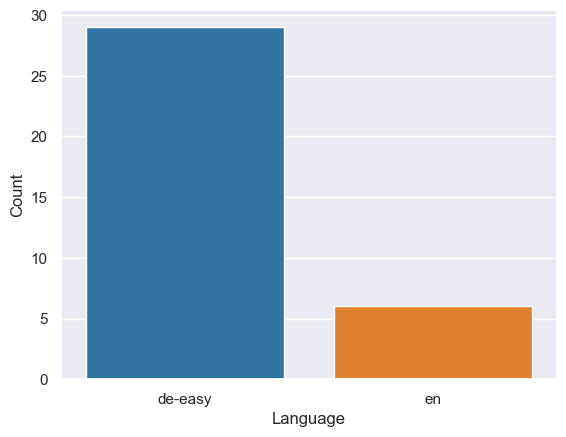

In [118]:
#plot language
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="language", data=df, palette="tab10")
ax.set(xlabel='Language', ylabel='Count')
plt.show()

Most of the participants were native German speakers. This is what we expected and will not affect the results negatively, as our recommender is proposed for German radio.

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\3872337975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="gender", data=df, palette="tab10")


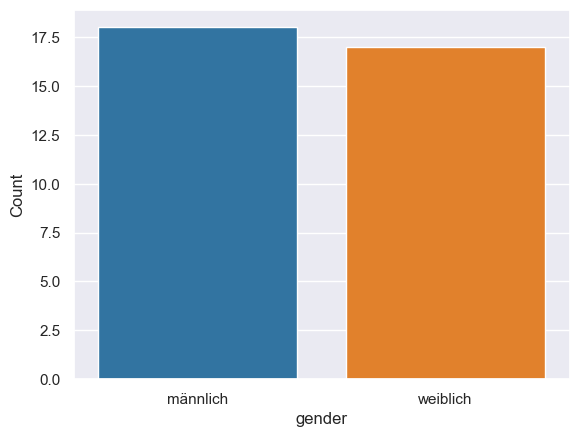

In [120]:
#plot gender
ax = sns.countplot(x="gender", data=df, palette="tab10")
ax.set(xlabel="gender", ylabel="Count")
plt.show()

Nearly perfect equality between men and women makes for a representative survey

In [96]:
from datetime import datetime
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%d.%m.%Y %H:%M')
current_date = datetime.now()
df['age'] = (current_date - df['birthdate']).dt.days / 365.25

In [97]:
df['age'] = df['age'].round(0)
df['age'] = df['age'].astype(int)
df['age'].describe()

count    35.000000
mean     33.057143
std      12.290462
min      21.000000
25%      24.500000
50%      27.000000
75%      38.500000
max      64.000000
Name: age, dtype: float64

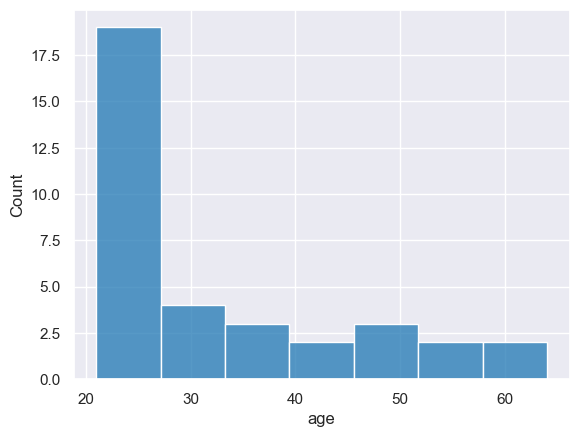

In [98]:
#plot age
ax = sns.histplot(x="age", data=df)
ax.set(xlabel="age", ylabel="Count")
plt.show()

The majority of our participants are in their mid-twenties, as most of the survey participants were recruited through the project partners' social media channels. Therefore they have the same age range. However, all age groups from 21 to 64 were represented.

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\2162030254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="country_youth", data=df, palette="tab10")


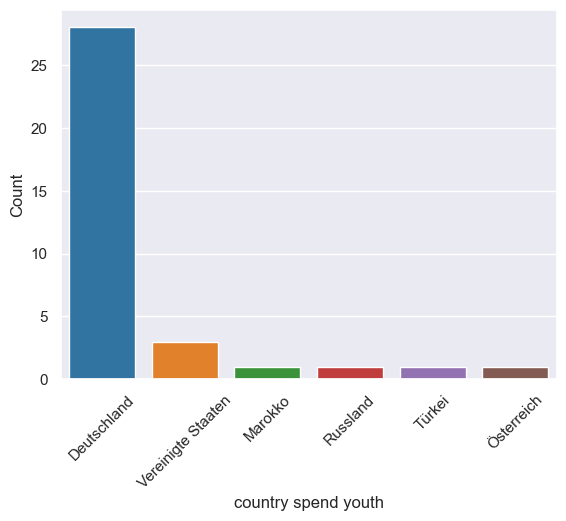

In [121]:
#plot country_youth
ax = sns.countplot(x="country_youth", data=df, palette="tab10")
ax.set(xlabel="country spend youth", ylabel="Count")
plt.xticks(rotation=45)
plt.show()

The majority spend their youth in Germany. 

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\1910591152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="how_often_80s", data=df, palette="tab10")


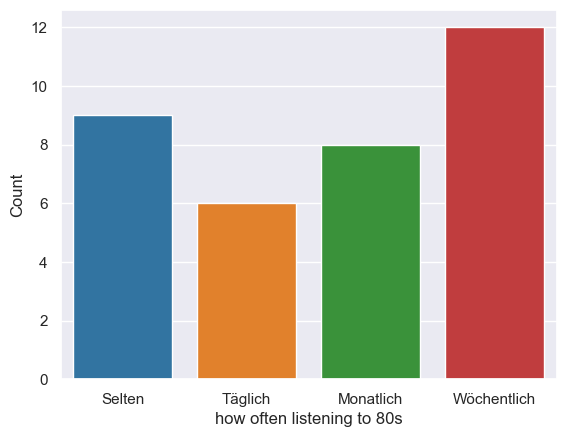

In [122]:
#plot how_often_80s
ax = sns.countplot(x="how_often_80s", data=df, palette="tab10")
ax.set(xlabel="how often listening to 80s", ylabel="Count")
plt.show()

Every participant has listened to 80s music at least once in their life. The majority listen to 80s music at least once a month.

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\1445583127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="used_recommender", data=df, palette="tab10")


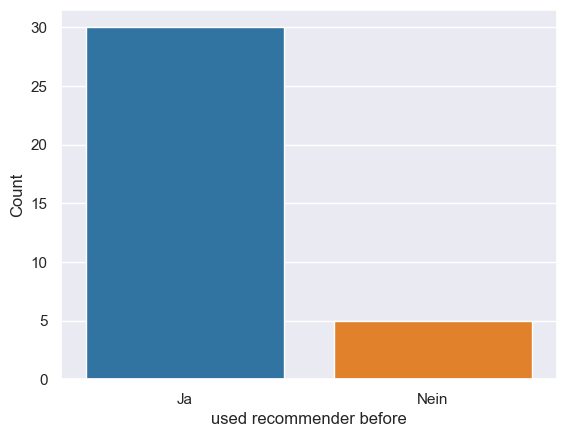

In [123]:
# plot used_recommender
ax = sns.countplot(x="used_recommender", data=df, palette="tab10")
ax.set(xlabel="used recommender before", ylabel="Count")
plt.show()

Over 85% have used a music recommender. In the age of streaming music, most people are using song recommenders without even knowing it.

In [102]:
df['openess3'].unique()

array(['Sehr gut', 'Weniger gut', 'Gut'], dtype=object)

In [103]:
op_dict = {"Sehr": 4, "Mäßig": 3, "Weniger": 2, "Gar nicht": 1}
op3_dict = {"Sehr gut": 4, "Gut": 3, "Weniger gut": 2, "Gar nicht gut": 1}

In [104]:
df['openess1'] = df['openess1'].map(op_dict)
df['openess2'] = df['openess2'].map(op_dict)
df['openess3'] = df['openess3'].map(op3_dict)

In [105]:
df["mean_openess"] = df[['openess1', 'openess2', 'openess3']].mean(axis=1)
df["mean_openess"].describe()

count    35.000000
mean      3.257143
std       0.524471
min       2.333333
25%       2.833333
50%       3.333333
75%       3.666667
max       4.000000
Name: mean_openess, dtype: float64

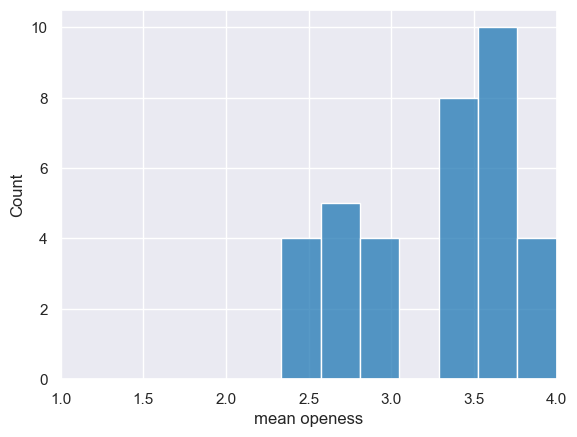

In [106]:
#plot mean_openess
ax = sns.histplot(x="mean_openess", data=df)
ax.set(xlabel="mean openess", ylabel="Count")
#x axis from 1 to 4
plt.xlim(1, 4)
plt.show()

We had no participants that are not opened to new things. We had basically two groups. One that is slightly opened and the other one that is totally opened.

In [107]:
#mean general questions survey 1
df["mean1"] = df[['q1_general', 'q3_general', 'q4_general', 'q5_general', 'q6_general', 'q7_general', 'q8_general', 'q9_general', 'q10_general', 'q11_general', 'q12_general', 'q13_general', 'q14_general', 'q15_general', 'q16_general', 'q17_general', 'q18_general', 'q19_general', 'q20_general']].mean(axis=1)
df["mean1"].describe()

count    35.000000
mean      6.072180
std       1.358747
min       2.578947
25%       5.184211
50%       6.315789
75%       7.000000
max       8.368421
Name: mean1, dtype: float64

In [108]:
df["mean2"] = df[['q1_general_2', 'q3_general_2', 'q4_general_2', 'q5_general_2', 'q6_general_2', 'q7_general_2', 'q8_general_2', 'q9_general_2', 'q10_general_2', 'q11_general_2', 'q12_general_2', 'q13_general_2', 'q14_general_2', 'q15_general_2', 'q16_general_2', 'q17_general_2', 'q18_general_2', 'q19_general_2', 'q20_general_2']].mean(axis=1)
df["mean2"].describe()

count    35.000000
mean      6.565414
std       0.984427
min       4.210526
25%       6.105263
50%       6.473684
75%       7.236842
max       8.894737
Name: mean2, dtype: float64

In [109]:
df["mean3"] = df[['q1_general_3', 'q3_general_3', 'q4_general_3', 'q5_general_3', 'q6_general_3', 'q7_general_3', 'q8_general_3', 'q9_general_3', 'q10_general_3', 'q11_general_3', 'q12_general_3', 'q13_general_3', 'q14_general_3', 'q15_general_3', 'q16_general_3', 'q17_general_3', 'q18_general_3', 'q19_general_3', 'q20_general_3']].mean(axis=1)
df["mean3"].describe()

count    35.000000
mean      6.992481
std       1.466265
min       3.368421
25%       6.368421
50%       7.052632
75%       7.842105
max       9.789474
Name: mean3, dtype: float64

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\4068241595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x, y=y, palette="tab10")


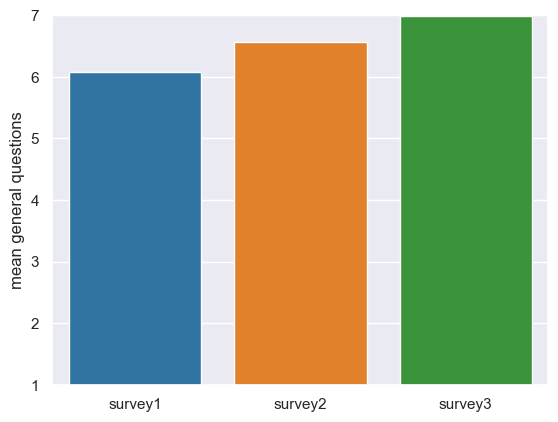

In [127]:
x = ["survey1", "survey2", "survey3"]
y = [df["mean1"].mean(), df["mean2"].mean(), df["mean3"].mean()]
ax = sns.barplot(x=x, y=y, palette="tab10")
ax.set(ylabel="mean general questions")
plt.ylim(1, 7)
plt.show()

the ratings increased from recommender version to recommender version. This suggests that our recommendations also improved with the versions. It doesn't seem like a big increase, but since we already started with a high baseline rating, it can also be considered that we have increased by about 25% on a scale from the baseline (about 6) to the maximum rating (10).

In [111]:
survey_songs = pd.read_csv('part1/survey_songs.csv')

In [112]:
themes = list(survey_songs['theme'].unique())
themes.remove('country')
themes

['alt_rock',
 'dance',
 'disco',
 'funk',
 'hard_rock',
 'metal',
 'pop',
 'punk',
 'singer_songwriter',
 'synth_pop']

In [113]:
#mean values for each question
mean_values_1 = []
mean_values_2 = []
mean_values_3 = []
for i in range(1, 21):
    if i == 2:
        continue
    mean_values_1.append(df[f'q{i}_general'].mean())
    mean_values_2.append(df[f'q{i}_general_2'].mean())
    mean_values_3.append(df[f'q{i}_general_3'].mean())

In [114]:
mean_theme_1 = [mean_values_1[0]]
mean_theme_2 = [mean_values_2[0]]
mean_theme_3 = [mean_values_3[0]]
for i,x  in enumerate(mean_values_1):
    if i == 0:
        continue
    if i % 2 == 0:
        mean_theme_1.append((x+mean_values_1[i-1])/2)
for i,x  in enumerate(mean_values_2):
    if i == 0:
        continue
    if i % 2 == 0:
        mean_theme_2.append((x+mean_values_2[i-1])/2)
for i,x  in enumerate(mean_values_3):
    if i == 0:
        continue
    if i % 2 == 0:
        mean_theme_3.append((x+mean_values_3[i-1])/2)

    

In [115]:
theme_df = pd.DataFrame({'theme': themes, 'survey1': mean_theme_1, 'survey2': mean_theme_2, 'survey3': mean_theme_3})
#pivot surveys
theme_df = theme_df.melt('theme', var_name='survey',  value_name='mean')
theme_df

,theme,survey,mean
0,alt_rock,survey1,6.142857
1,dance,survey1,6.400000
2,disco,survey1,6.342857
3,funk,survey1,5.785714
4,hard_rock,survey1,6.428571
5,metal,survey1,6.614286
6,pop,survey1,5.457143
7,punk,survey1,4.757143
8,singer_songwriter,survey1,6.028571
9,synth_pop,survey1,6.800000


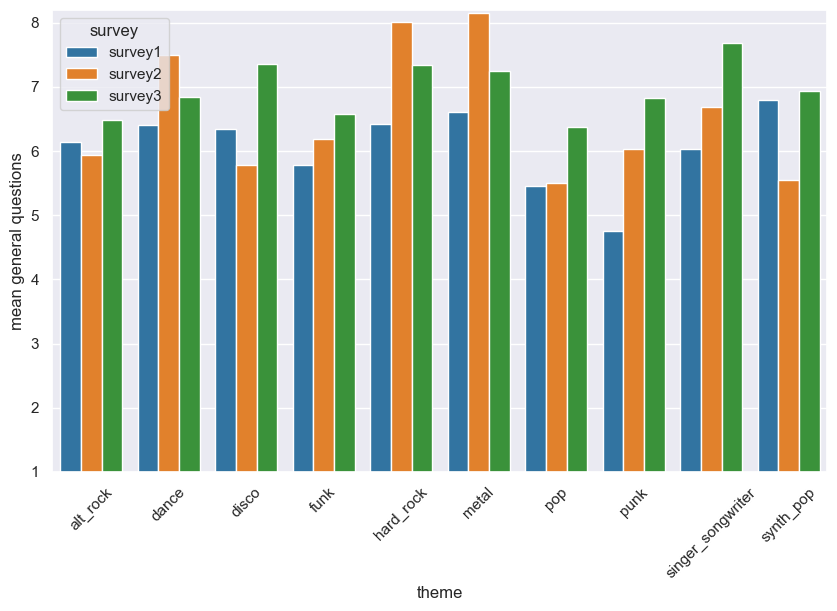

In [116]:

#plot mean values for each theme
plt.figure(figsize=(10,6))
ax = sns.barplot(x="theme", y="mean", hue="survey", data=theme_df)
ax.set(ylabel="mean general questions")
#y axis from 1 to 9
plt.ylim(1, 8.2)
plt.xticks(rotation=45)
plt.show()

This graph shows the development of the recommender versions in relation to the song themes (genre groups). the best result of the final recommender was achieved with sing songwriters. From this we can conclude that the features we have gained from the lyrics have a major influence. In the area of rock and metal, a loss is visible compared to the second version. this could be partly due to the fact that the second version recommended more popular songs that generally receive a better rating. The same song was always recommended for the Country theme, which is why it was not included in the evaluation. in addition, the significance of the theme ratings should be viewed with caution as only two songs per theme were represented

C:\Users\marti\AppData\Local\Temp\ipykernel_25512\679577410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x, y=y, palette="tab10")


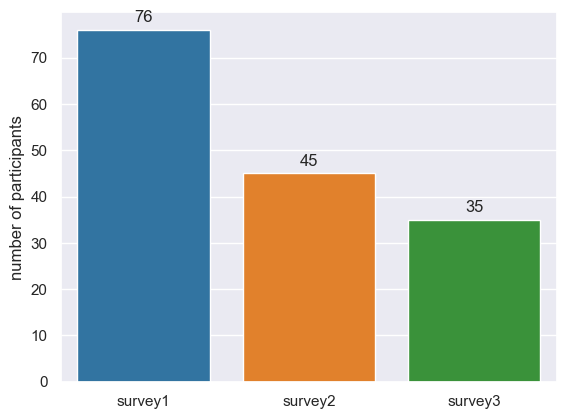

In [125]:
y = [76, 45, 35]
x = ["survey1", "survey2", "survey3"]
ax = sns.barplot(x=x, y=y, palette="tab10")
ax.set(ylabel="number of participants")
#show numbers on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

Here you can see again how many participants we had in each survey. Only the people who completed the respective part and left their email address in the first part were taken into account. The total number of participants in the first part was 133 people. However, the majority cancelled in the meantime. 
For this reason, we also cancelled part 1 of the survey during the survey period. According to the feedback, participation simply took too long and it was also difficult to evaluate the recommendations in relation to the song lyrics as the audible preview sometimes contained no vocals at all. So from now on only the recommendation as a whole was rated and no longer separated into lyrics, sound and general.

In general, a closer look at the survey results would be helpful to further improve the recommender. However, this was not possible due to a lack of time.